In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Задание 1
## 1. При помощи функции make_blobs() из модуля sklearn.datasets (см.пример ниже) сгенерировать исходные данные для задачи классификации:
## – матрицу признаков, содержащую по три признака для 500 примеров;
## – массив целевых меток, представляющий четыре класса.
## Значения аргументов random_state и cluster_std функции make_blobs() необходимо взять из табл.1.

In [2]:
x, y = make_blobs(500, 3, centers=4, random_state=5, cluster_std=1.2)

# Задание 2
## Выполнить разделение набора данных на тренировочный и тестовый наборы. Вывести на печать размерности полученных массивов. Вывести на печать уникальные метки классов в наборе данных.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=0, stratify=y)

In [4]:
print(f'''Обучающий набор:
Размерность массива признаков: {x_train.shape}
Размерность целевых признаков: {y_train.shape}
Уникальные метки классов: {np.unique(y_train)}

Тестовый набор:
Размерность массива признаков: {x_test.shape}
Размерность целевых признаков: {y_test.shape}
Уникальные метки классов: {np.unique(y_test)}''')

Обучающий набор:
Размерность массива признаков: (350, 3)
Размерность целевых признаков: (350,)
Уникальные метки классов: [0 1 2 3]

Тестовый набор:
Размерность массива признаков: (150, 3)
Размерность целевых признаков: (150,)
Уникальные метки классов: [0 1 2 3]


# Задание 3
## Выполнить масштабирование признаков.

In [5]:
standard_scaler = StandardScaler()

standard_scaler.fit(x_train)

x_train_scaled = standard_scaler.transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

# Задание 4
## Решить задачу классификации с использованием метода, указанного в табл.1.

In [9]:
lg = LogisticRegression(random_state=0)
lg.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

# Задание 5
## Проверить работу классификатора на тестовых данных. Определить и вывести на печать:
## – число неверно классифицированных образов;
## – "верность" классификации (в комментариях пояснить, что обозначает полученное значение "Верности");
## – вероятности принадлежности образцов с номерами 10, 20 и 100 различным классам (только для модели логистической регрессии).

In [10]:
y_pred_lg = lg.predict(x_test_scaled)
y_pred_train_lg = lg.predict(x_train_scaled)
mean_mistakes_lg = ((y_test!=y_pred_lg).sum() + (y_train!=y_pred_train_lg).sum())/2

print(f'''Число неверно классифицированных образов: {(y_test!=y_pred_lg).sum()}''')
print(f'''Верность классификации: {accuracy_score(y_test, y_pred_lg)}''')

Число неверно классифицированных образов: 1
Верность классификации: 0.9933333333333333


# Задание 6
## Для трёх проекций пространства признаков построить графики, иллюстрирующие расположение объектов различных классов. Классы на графиках обозначать различными цветами и маркерами. Обвести на графиках окружностями те объекты, которые были неверно классифицированы.

In [13]:
wrong = x_test[y_test != y_pred_lg]
right = x_test[y_test == y_pred_lg]

<Figure size 640x480 with 0 Axes>

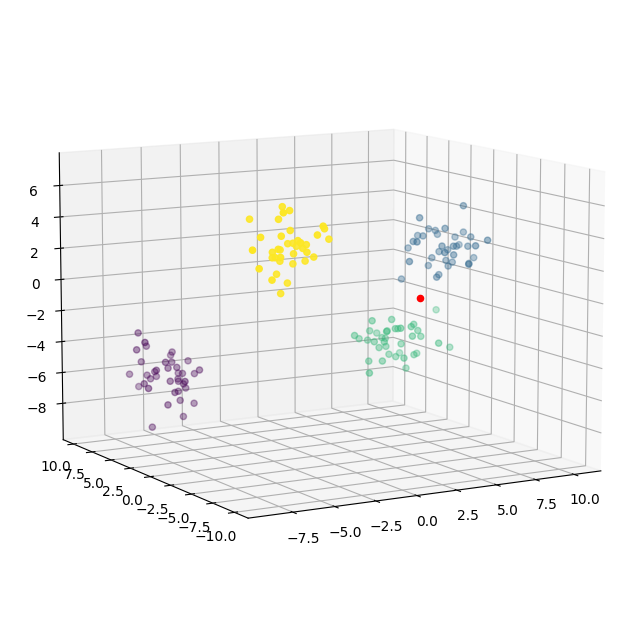

In [16]:
fig = plt.figure()
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=-120)
ax.scatter(right[:, 0], right[:, 1], right[:, 2], c=y_test[y_test == y_pred_lg])
ax.scatter(wrong[:, 0], wrong[:, 1], wrong[:, 2], c='red')
plt.show()

## В ходе лабораторной работы для линейно разделимых объектов, состоящих из 3 признаков и разделенных на 4 класса была решена задача классификации.

## Для решения задачи использовалась модель логистической регрессии, которая по итогам обучения показала отличные результаты: на тестовом наборе данных неверно был распознан 1 объект. Таким образом, точность на тестовой выборке составила 99.3%.
